In [2]:
#importamos nuestras librerias
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
#cargar nuesto dataset
boston = load_boston()

In [4]:
?load_boston

In [5]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [6]:
df['Price']= boston.target


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Creamos nuestros datasets
X = df.drop('Price',axis=1)
y = df.Price

In [12]:
#Datasets de entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=1)

In [10]:
#Creando modelo de regresión lineal

linreg = LinearRegression()

In [13]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
train_score = linreg.score(x_train,y_train)
test_score = linreg.score(x_test,y_test)

In [15]:
train_score

0.7293585058196337

In [18]:
test_score

0.7634174432138451

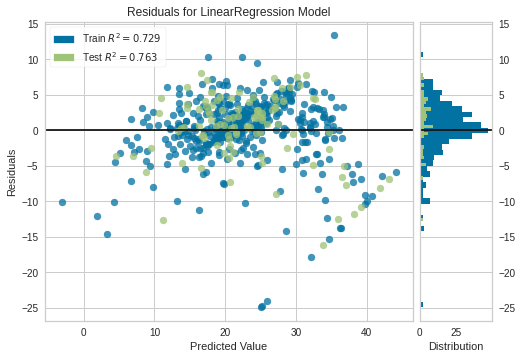

In [20]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(linreg, hist=True)
visualizador.fit(x_train, y_train)
visualizador.score(x_test,y_test)
g = visualizador.poof()

In [21]:
y_pred = linreg.predict(x_test)
df_predict = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_predict.head()

,Actual,Predicted
307,28.2,32.655032
343,23.9,28.093495
47,16.6,18.029018
67,22.0,21.476716
362,20.8,18.825439


#Ridge
Es de mucho uso para encontrar una linea que no se "ajuste" tan bien a nuestros datos. 
Generar un poco de BIAS a nuestros elementos.


In [22]:
#Lo usamos cuando tenemos multicolinearidad
#Acercamos a 0 nuestros coeficientes
#Si no se agrega un alpha, signiica que no jhay cambio y es igual a una Regresión lineal
rr = Ridge()
rr.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
rr20 = Ridge(alpha=20)
rr20.fit(x_train,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [26]:
ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
ridge_train_score_20 = rr20.score(x_train, y_train)
ridge_test_score_20 = rr20.score(x_test, y_test)

In [27]:
from sklearn.model_selection import GridSearchCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold
#A partir de nuestro dataset, va a estar validando con 30 distintos datasets

#Usarlo cuando nuestros datasets con Pequeños o medianos
#Usarlo cuando nuestro modelo no es computacionalmente costoso
cv = RepeatedKFold(n_splits=10,n_repeats=3, random_state=1)

In [28]:
grid = dict()
#
grid['alpha']= arange(0,1,.01)

In [29]:
#Primer parametro es nuestro algoritmo 
#Segundo parametro son las alphas con las que vamos a probas
#El neg mean es caso contrario al mae, entre más positivo, mejor.
mejor_param_busqueda = GridSearchCV(rr, grid, scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)

In [31]:
results = mejor_param_busqueda.fit(x_train, y_train)
#Regresa nuestro mejor MAE (en este caso entre más "positivo",mejor)
print('MAE: %.3f' % results.best_score_)
#El alpha que se uso para obtener el best_score, el mejor mae
print('Configuracion: %s' % results.best_params_)

MAE: -3.316
Configuracion: {'alpha': 0.61}


In [32]:
rr_best_mae = Ridge(alpha=.61)
rr_best_mae.fit(x_train,y_train)

Ridge(alpha=0.61, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
ridge_train_score_best_score = rr_best_mae.score(x_train, y_train)
ridge_test_score_best_score = rr_best_mae.score(x_test, y_test)

In [35]:
#Linear Regression
print(train_score)
print(test_score)
#Alpha 1
print(ridge_train_score) 
print(ridge_test_score)
#Alpha 20 
print(ridge_train_score_20) 
print(ridge_test_score_20)
#ALpha .61
print(ridge_train_score_best_score)
print(ridge_test_score_best_score)

0.7293585058196337
0.7634174432138451
0.7264412428697166
0.7655800611077147
0.71506192013302
0.7500172335648554
0.7277674789704478
0.7655789035784946
